# 作業 : (Kaggle)鐵達尼生存預測
https://www.kaggle.com/c/titanic

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

%matplotlib inline

data_path = 'data/'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')

train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

5 Numeric Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



In [3]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
train_num = train_Y.shape[0]
df.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


# 作業1
* 試著在補空值區塊, 替換並執行兩種以上填補的缺值, 看看何者比較好?

In [4]:
# 空值補 -1, 做羅吉斯迴歸
df_m1 = df.fillna(-1)
train_X = df_m1[:train_num]
estimator = LogisticRegression(solver='lbfgs')
score = cross_val_score(estimator, train_X, train_Y, cv=5).mean()
print(f'空值補-1: {score:.4f}')

# 空值補 0, 做羅吉斯迴歸
df_m1 = df.fillna(0)
train_X = df_m1[:train_num]
estimator = LogisticRegression(solver='lbfgs')
score = cross_val_score(estimator, train_X, train_Y, cv=5).mean()
print(f'空值補0: {score:.4f}')

空值補-1: 0.6983
空值補0: 0.6994


# 作業2
* 使用不同的標準化方式 ( 原值 / 最小最大化 / 標準化 )，搭配羅吉斯迴歸模型，何者效果最好?

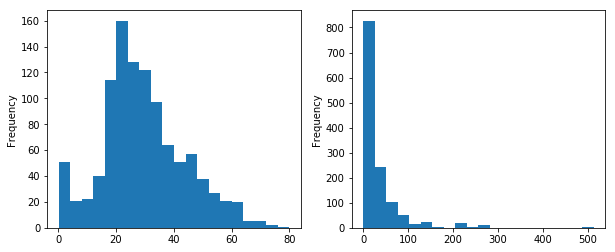

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
df['Age'].plot.hist(bins = 20, ax = ax[0])
df['Fare'].plot.hist(bins = 20, ax = ax[1])

In [6]:
#原值
df['Fare'].fillna(df['Fare'].mode(), inplace = True)
df['Age'].fillna(df['Age'].median(), inplace = True)
df.fillna(0, inplace = True)
train_X = df[:train_num]
estimator = LogisticRegression(solver='lbfgs')
_ = cross_val_score(estimator, train_X, train_Y, cv=5).mean()
print(f'原值: {_:.4f}')

#最大最小化
df_minmax = MinMaxScaler().fit_transform(df)
train_X = df_minmax[:train_num]
estimator = LogisticRegression(solver='lbfgs')
_ = cross_val_score(estimator, train_X, train_Y, cv=5).mean()
print(f'最小最大化: {_:.4f}')

#標準化
df_standard = StandardScaler().fit_transform(df)
train_X = df_standard[:train_num]
estimator = LogisticRegression(solver='lbfgs')
_ = cross_val_score(estimator, train_X, train_Y, cv=5).mean()
print(f'標準化: {_:.4f}')

原值: 0.6971
最小最大化: 0.7005
標準化: 0.6971
